In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
#%cd /content/drive/MyDrive/Omdena_Project/Disaster Images/DisasterImages/
%cd /content/drive/MyDrive/Violent_Crimes/

/content/drive/MyDrive/Violent_Crimes


In [107]:
#Path = '/content/drive/.shortcut-targets-by-id/1kCJm_BfCSDwqN8da_qZJ7R7Gu4q2SP9e/Disaster Images/DisasterImages'
Path = '/content/drive/MyDrive/Violent_Crimes'

#Path='/content/drive/MyDrive/Train_Test/Test'
# Path='/content/drive/MyDrive/Disaster Images SA'

In [95]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
##################### Making Essential Imports ############################
import sklearn
import os
import sys
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import load_model, Model
conf = r'-- oem 2'

In [97]:
#####################################
# Defining a skeleton for our       #
# DataFrame                         #
#####################################
DataFrame = {
    'photo_name' : [],
    'flattenPhoto' : [],
    'text' : [],
    }

In [98]:
#######################################################################################
#      The Approach is to apply transfer learning hence using Resnet50 as             #
#      pretrained model                                                               #
#######################################################################################

#MyModel = tf.keras.models.Sequential()
from keras.applications import VGG16

#MyModel.add(tf.keras.applications.ResNet50(include_top = False, weights='imagenet', pooling='avg'))
vgg=VGG16(include_top = False, weights='imagenet', pooling='avg')

In [99]:
# freezing weights for 1st layer
for i in vgg.layers:
    i.trainable = False

In [100]:
### Now defining dataloading Function
def LoadDataAndDoEssentials(path, h, w):

    img = cv2.imread(path)
    #DataFrame['text'].append(pytesseract.image_to_string(img, config = conf))
    img = cv2.resize(img, (h, w))
    ## Expanding image dims so this represents 1 sample
    img = img = np.expand_dims(img, 0)
    #img = vgg.preprocess_input(img)
    img=tf.keras.applications.vgg16.preprocess_input(img)
    extractedFeatures = vgg.predict(img)
    extractedFeatures = np.array(extractedFeatures)
    DataFrame['flattenPhoto'].append(extractedFeatures.flatten())

In [101]:
### with this all done lets write the iterrrative loop
def ReadAndStoreMyImages(path):

    list_ = os.listdir(path)
    for mem in list_:
        DataFrame['photo_name'].append(mem)
        imagePath = path + '/' + mem
        LoadDataAndDoEssentials(imagePath, 224, 224)
        

In [102]:
Path

'content/drive/MyDrive/Violent_Crimes'

In [108]:
### lets give the address of our Parent directory and start
ReadAndStoreMyImages(Path)

1/1 [==============================] - 0s 487ms/step


In [109]:
######################################################
#        lets now do clustering                      #
######################################################
Training_Feature_vector = np.array(DataFrame['flattenPhoto'], dtype = 'float64')
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(n_clusters = 2)
kmeans.fit(Training_Feature_vector)

AgglomerativeClustering()

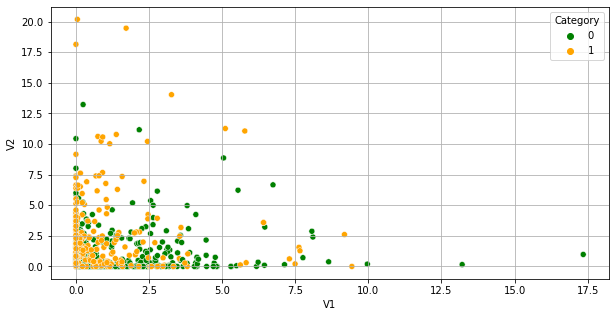

In [110]:
## lets make this a dataFrame
import seaborn as sb
import matplotlib.pyplot as plt

dimReducedDataFrame = pd.DataFrame(Training_Feature_vector)

dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2'})
dimReducedDataFrame['Category'] = list(kmeans.labels_)
plt.figure(figsize = (10, 5))
sb.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',
                    palette=['green','orange'],hue = 'Category') 
plt.grid(True)
plt.show()

In [111]:
dimReducedDataFrame.head()

,V1,V2,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,Category
0,0.000000,0.000000,0.697586,0.000000,6.706108,0.000000,0.000000,1.321371,0.087616,1.386546,...,1.337081,1.518008,0.943677,2.871784,0.000000,0.000000,0.000000,0.197084,20.428185,0
1,0.000000,4.479715,1.505864,2.520824,3.851623,4.731763,0.000000,2.690261,4.497195,4.644281,...,1.586502,1.820276,1.958574,1.556033,0.000000,2.090749,7.716406,1.575340,25.674131,0
2,0.581372,0.000000,16.367874,0.711416,0.252486,1.441487,2.029824,0.863911,0.084264,0.660836,...,0.633747,0.904982,5.777879,0.262399,1.288876,3.829446,0.156514,2.419455,7.892738,0
3,0.877685,0.000000,5.655093,0.000000,0.069915,0.567505,0.067189,0.000000,2.025145,1.623758,...,0.893171,0.058438,1.518216,0.099681,1.603952,1.761833,4.756461,0.000000,12.330095,0
4,0.000000,0.171744,0.000000,0.000000,8.933729,0.324695,0.412689,0.416995,0.000000,3.874713,...,1.159406,0.149235,4.035135,2.781324,0.000000,0.539928,0.000000,0.616024,21.564575,0


In [120]:
#Can plot the images here if required
clust_list={0:0,1:0}
Seperated_images_name = {'Violent':[],'Non Violent':[]}

for index,i in enumerate(dimReducedDataFrame['Category']):
    if i in clust_list.keys():
        clust_list[i]=clust_list[i]+1

        if i==0:
          Seperated_images_name['Violent'].append(DataFrame['photo_name'][index])
        elif i==1:
          Seperated_images_name['Non Violent'].append(DataFrame['photo_name'][index])
          
clust_list    

{0: 512, 1: 247}

In [121]:
(Seperated_images_name['Violent'])

['flr_195.jpg',
 'flr_181.jpg',
 'flr_178.jpg',
 'flr_183.jpg',
 'flr_182.jpg',
 'flr_194.jpg',
 'flr_168.jpg',
 'flr_177.jpg',
 'flr_175.jpg',
 'flr_176.jpg',
 'flr_167.jpg',
 'flr_163.jpg',
 'flr_162.jpg',
 'flr_164.jpg',
 'flr_166.jpg',
 'flr_154.jpg',
 'flr_151.jpg',
 'flr_155.jpg',
 'flr_150.jpg',
 'flr_146.jpg',
 'flr_145.jpg',
 'flr_140.jpg',
 'flr_143.jpg',
 'flr_144.jpg',
 'flr_139.jpg',
 'flr_136.jpg',
 'flr_132.jpg',
 'flr_133.jpg',
 'flr_131.jpg',
 'flr_135.jpg',
 'flr_130.jpg',
 'flr_291.jpg',
 'flr_289.jpg',
 'flr_285.jpg',
 'flr_281.jpg',
 'flr_273.jpg',
 'flr_282.jpg',
 'flr_267.jpg',
 'flr_263.jpg',
 'flr_242.jpg',
 'flr_256.jpg',
 'flr_239.jpg',
 'flr_238.jpg',
 'flr_236.jpg',
 'flr_240.jpg',
 'flr_252.jpg',
 'flr_265.jpg',
 'flr_234.jpg',
 'flr_229.jpg',
 'flr_231.jpg',
 'flr_230.jpg',
 'flr_228.jpg',
 'flr_225.jpg',
 'flr_223.jpg',
 'flr_218.jpg',
 'flr_215.jpg',
 'flr_208.jpg',
 'flr_206.jpg',
 'flr_207.jpg',
 'flr_214.jpg',
 'flr_210.jpg',
 'flr_197.jpg',
 'flr_19

In [114]:
#To visualise the elbow point
from sklearn.cluster import KMeans

#kMeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dimReducedDataFrame)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


AgglomerativeClustering()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

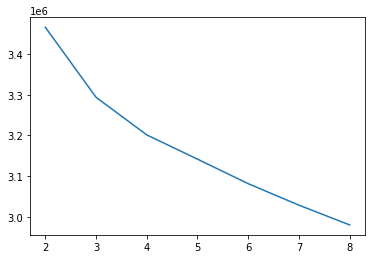

In [115]:
ssd = []
range_of_clusters = [2, 3, 4, 5, 6, 7, 8]
for num in range_of_clusters:
    kmeans = KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(dimReducedDataFrame)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_of_clusters,ssd)